In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data = pd.read_excel("C:\\Users\\ASUS\\Downloads\\Logistic Regression .xlsx")
data.head()

,Cash Compensation,Sales,No.of Employees,Capital Investment,Manufacturing
0,212,32.0,248,10.5,1
1,226,27.2,156,3.8,0
2,237,49.5,348,14.6,1
3,239,34.0,196,5.0,0
4,242,52.8,371,15.9,1


                    Cash Compensation     Sales  No.of Employees  \
Cash Compensation            1.000000  0.903011         0.722292   
Sales                        0.903011  1.000000         0.891040   
No.of Employees              0.722292  0.891040         1.000000   
Capital Investment           0.850533  0.925308         0.923409   
Manufacturing                0.090179  0.053149         0.171090   

                    Capital Investment  Manufacturing  
Cash Compensation             0.850533       0.090179  
Sales                         0.925308       0.053149  
No.of Employees               0.923409       0.171090  
Capital Investment            1.000000       0.172671  
Manufacturing                 0.172671       1.000000  


<AxesSubplot:>

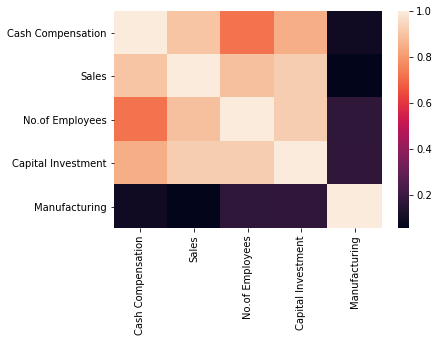

In [29]:
print(data.corr())
sns.heatmap(data.corr())

In [31]:
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import classification_report, confusion_matrix, r2_score,accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [53]:
#Multiple Linear Regression
X=data.drop(["Cash Compensation","Manufacturing"],axis=1).copy() # Define dependent and independent variable 
Y=data["Cash Compensation"]
lr = LinearRegression()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0) # Split data into training and test set (75:25)
train=lr.fit(X_train,Y_train)
pred=lr.predict(X_test)
pred2=lr.predict(X_train)
print("The R square using scikit is : ",r2_score(Y_train,pred2))#Accuracy
print("The intercept is : ",lr.intercept_)
print("The coefficients of other variables are : ",lr.coef_)
print("The predicted values : ",pred)

The R square using scikit is :  0.9835443899467593
The intercept is :  216.64335070532852
The coefficients of other variables are :  [ 1.63706324 -0.01992782 -3.27318315]
The predicted values :  [-38.15380861 286.86700394 350.11176671 329.71918618 245.62463571
  36.46240292]


In [56]:
#Accuracy and model summary using OLS and statsmodel
X_train=sm.add_constant(X_train)
model=sm.OLS(Y_train,X_train)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Cash Compensation   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     239.1
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           5.78e-11
Time:                        22:54:22   Log-Likelihood:                -65.278
No. Observations:                  16   AIC:                             138.6
Df Residuals:                      12   BIC:                             141.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                216.6434      6

C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\ASUS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [34]:
# RandomForest Regressor
rf = RandomForestRegressor()
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X,Y,random_state=0)
rf.fit(X2_train,Y2_train)
tr_pred = rf.predict(X2_train)
te_pred = rf.predict(X2_test)
print("The accuracy for train data : ",r2_score(Y2_train,tr_pred))
print("The accuracy for test data : ",r2_score(Y2_test,te_pred))

The accuracy for train data :  0.9880122016186577
The accuracy for test data :  0.24805400547455947


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [35]:
##Logistic Regression
X=data.drop(["Manufacturing"],axis=1).copy() # Define dependent and independent variable 
Y=data["Manufacturing"]
lor = LogisticRegression()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0) # Split data into training and test set (75:25)
train=lor.fit(X_train,Y_train)
pred=lor.predict(X_test)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
print("The intercept is : ",lor.intercept_)
print("The coefficients of other variables are : ",lor.coef_)

The intercept is :  [0.00616795]
The coefficients of other variables are :  [[-0.00630993 -0.72888411  0.1132008   0.11502436]]


In [37]:
# Define the confusion matrix for the model on testing data
cm = confusion_matrix(Y_test, pred)
print ("The confusion matrix is : \n",cm)

The confusion matrix is : 
 [[1 0]
 [1 4]]


Confusion Matrix : 
 [[9 0]
 [0 7]]


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


<AxesSubplot:title={'center':'Confusion Matrix'}>

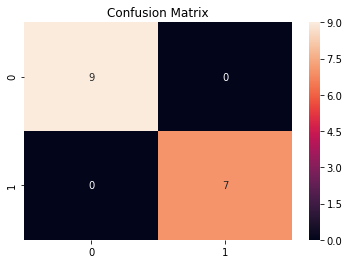

In [38]:
#Plotting confusion matrix for training data
ax=plt.subplot()
#labels titles ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actuals') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0s', '1s']); ax.yaxis.set_ticklabels(['0s', '1s'])

tr1_pred = lor.predict(X_train)
cm1 = confusion_matrix(Y_train,tr1_pred)
print("Confusion Matrix : \n",cm1)
sns.heatmap(cm1,annot = True,ax=ax) #annot=True to annotate cells

In [39]:
#The classification table for testing data
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.80      0.89         5

    accuracy                           0.83         6
   macro avg       0.75      0.90      0.78         6
weighted avg       0.92      0.83      0.85         6



In [43]:
print ("Accuracy for test data : ", accuracy_score(Y_test,pred)) #accuracy score
print ("Precision for test data : ", precision_score(Y_test,pred))
print ("Recall_score for test data : ", recall_score(Y_test,pred))
print ("F1 score for test data : ", f1_score(Y_test,pred))
print ("Accuracy : ", accuracy_score(Y_train,tr1_pred)) #accuracy score #comes to be 1 if train test as 80:2
lor.predict_proba(X_train) #Predicting probabilities of the independent variables in the model - training data

Accuracy for test data :  0.8333333333333334
Precision for test data :  1.0
Recall_score for test data :  0.8
F1 score for test data :  0.888888888888889
Accuracy :  1.0


array([[9.99376772e-01, 6.23227781e-04],
       [0.00000000e+00, 1.00000000e+00],
       [4.17794344e-03, 9.95822057e-01],
       [1.23487398e-02, 9.87651260e-01],
       [9.99949389e-01, 5.06112419e-05],
       [2.14474697e-02, 9.78552530e-01],
       [2.91933895e-02, 9.70806610e-01],
       [9.78933829e-01, 2.10661714e-02],
       [6.71684930e-13, 1.00000000e+00],
       [9.94917444e-01, 5.08255642e-03],
       [9.86948425e-01, 1.30515754e-02],
       [9.97774253e-01, 2.22574731e-03],
       [9.71292972e-01, 2.87070275e-02],
       [9.70150408e-03, 9.90298496e-01],
       [9.99941321e-01, 5.86793555e-05],
       [9.99647144e-01, 3.52856038e-04]])

In [23]:
#Using OLS tod etermine model fit and significance of dependent variables
model=sm.OLS(Y_train,X_train)
results=model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:          Manufacturing   R-squared (uncentered):                   0.862
Model:                            OLS   Adj. R-squared (uncentered):              0.816
Method:                 Least Squares   F-statistic:                              18.71
Date:                Tue, 08 Sep 2020   Prob (F-statistic):                    4.29e-05
Time:                        21:56:24   Log-Likelihood:                        -0.25523
No. Observations:                  16   AIC:                                      8.510
Df Residuals:                      12   BIC:                                      11.60
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

C:\Users\ASUS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
